In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Download mnist set

In [22]:
!pip install mnist

fastai 1.0.40 requires dataclasses, which is not installed.
fastai 1.0.40 requires nvidia-ml-py3, which is not installed.
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [94]:

import mnist
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import seaborn as sns


## Explore data

In [99]:

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

num_inputs = 28 * 28


In [64]:
print('train data shape', train_images.shape)
print('train label shape', train_labels.shape)

print('test data shape', test_images.shape)
print('test label shape', test_labels.shape)


train data shape (60000, 28, 28)
train label shape (60000,)
test data shape (10000, 28, 28)
test label shape (10000,)


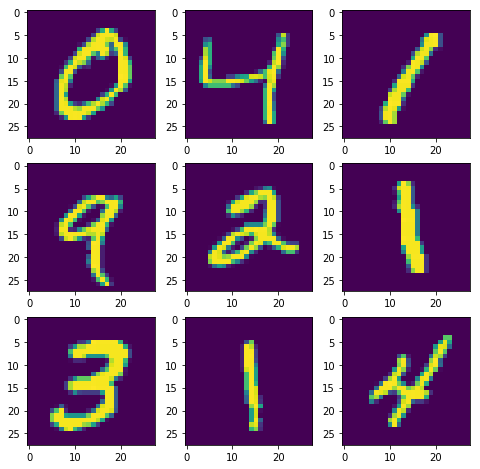

In [86]:

def print_digits(data_set, cols = 3, rows = 3):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, cols*rows +1):
        img = data_set[i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()
    
print_digits(train_images)



In [69]:
# look at the input format

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Preprocess data, normalization

In [161]:

x_train = train_images.reshape(-1,28*28)/255
y_train = train_labels

x_test = test_images.reshape(-1,28*28)/255
y_test = test_labels



In [162]:
print(len(x_test),len(y_test))

10000 10000


### Building Logistic regression with sklearn

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.linear_model import LogisticRegression



In [88]:

# Turn up tolerance for faster convergence
clf = LogisticRegression(multi_class='ovr', penalty='l2', solver='liblinear', tol=0.1, verbose = 1)


In [89]:

clf.fit(x_train, y_train)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.1,
          verbose=1, warm_start=False)

In [90]:

sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)


Sparsity with L2 penalty: 8.55%
Test score with L2 penalty: 0.8767


In [95]:

predictions = clf.predict(x_test)

cm = metrics.confusion_matrix(y_test, predictions)

print(cm)


[[ 960    0    0    1    0    3    9    2    5    0]
 [   0 1104    2    2    1    2    4    2   18    0]
 [  10   12  910   15   11    2   14   17   36    5]
 [   3    1   21  919    1   20    4   10   22    9]
 [   1    7    6    1  902    1    9    1   10   44]
 [  15    3    3   39   12  747   20   11   28   14]
 [   8    3    4    2   11   12  912    2    4    0]
 [   4   15   22    4    9    2    1  937    1   33]
 [   9   17    7   15   14   34   13   13  844    8]
 [  10    9    4   13   49    8    0   32   14  870]]


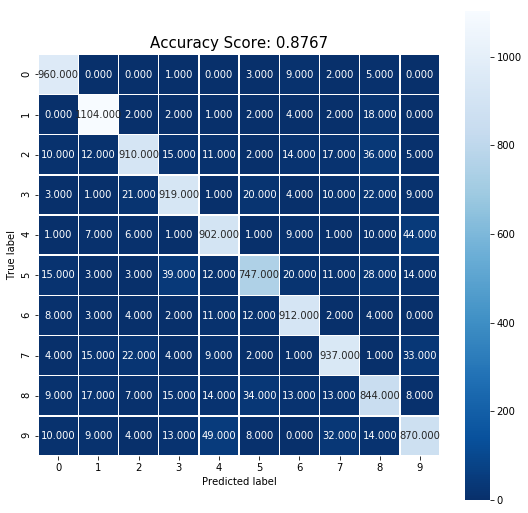

In [98]:

def plot_confusion_matrix(cmatrix, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cmatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    
def evaluate_confusion_matrix(y_test, predictions):
    return metrics.confusion_matrix(y_test, predictions)

def evaluate_and_plot_confusion_matrix(y_test, predictions, score):
    plot_confusion_matrix(evaluate_confusion_matrix(y_test, predictions), score)

    
evaluate_and_plot_confusion_matrix(y_test, predictions, score)

### Implementing Logistic classification from scratch

### Softmax

In [215]:

def softmax(z):
    """
    Implement the softmax function
    Arguments:
    z -- a k-length vector (float)
    Return:
    result -- the softmax function evaluated on z, returning a set of probability 
    of length k
    """
    result = 1/sum(np.exp(z)) * np.exp(z)
    return result



### One Hot encoding

In [186]:

def one_hot_encode(y):
    vector = np.array([0]*10)
    vector[y] = 1
    return vector


### Gradient

In [190]:

def gradient(w, x, y):
    """
    Implement the gradient 
    Arguments:
    w -- weights, an ndarray of size (num_outputs, num_inputs)
    x -- graphic data, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    y -- true "label" corresponding to x (float)
    Return:
    (-1)*grad -- negative gradient of the loss with respect to w, thus same shape as w
    """
    
    y_encoded = one_hot_encode(y)
    z = np.matmul(w, x)
    A = (y_encoded - softmax(z))
    grad = np.zeros(w.shape)
    
    for i in range(0,len(x)):
        grad[:,i] = x[i]*A
        
    return (-1) * grad


### Weight Initialization

In [175]:

def initialize(num_outputs,num_inputs):
    """
    Initialize random weights w
    
    Return: 
    w -- weights, an ndarray of size (num_outputs, num_inputs)
    """
    return np.random.randn(num_outputs,num_inputs) / np.sqrt(num_inputs)



In [176]:

def l_rate(base_rate, ite, num_iterations, schedule = False):
    if schedule == True:
        return base_rate * 10 ** (-np.floor(ite/num_iterations*4))
    else:
        return base_rate


In [177]:

def train(X_train, Y_train, num_iterations = 1000, learning_rate = 0.5):
    """
    Implement the stochastic gradient descent model 
    Arguments:
    X_train -- x_train data set, a 2darray of float in shape (num_training_data, num_inputs)
    Y_train -- y_train data set, a vector of float in shape (num_training_data,)
    num_iterations -- number of iterations to have
    learning_rate -- size of base learning rate
    Return:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    """
    # initialize the random weights
    w = initialize(num_outputs,num_inputs)
    
    # generate a random list of indices for the training set
    train_size = len(X_train)
    rand_indices = np.random.choice(train_size, num_iterations, replace=True)

    for i in rand_indices:
        w = w - gradient(w,X_train[i],Y_train[i]) * learning_rate
    return w 



### Predict

In [ ]:

def predict (w, x):
    """
    Predict y based on fitted weights and x
    Arguments:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    x -- graphic data for testing, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    Return:
    result -- predicted "label" corresponding to x (float)
    """
    dist = softmax(np.matmul(w, x))
    result = np.argmax(dist)
    return result


### Test

In [243]:

def testing(w, X_test, Y_test):
    """
    Test the model 
    Arguments:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    X_test -- x_test data set, a 2darray of float in shape (num_testing_data, num_inputs)
    Y_test -- y_test data set, a vector of float in shape (num_testing_data,)
    """
    total_correct = 0
    for n in range(len(X_test)):
        y = Y_test[n]
        x = X_test[n][:]
        prediction = predict (w , x)
        if (prediction == y):
            total_correct += 1
    # print('Accuarcy Test: ',total_correct/np.float(len(X_test)))
    return total_correct/np.float(len(X_test))


### Running logistic regression

In [244]:


####################################################################################
#Implementation of stochastic gradient descent algorithm
#number of inputs
num_inputs = 28*28
#number of outputs
num_outputs = 10

lr = 0.03
num_iter = 8000

w = train(x_train, y_train, num_iterations = num_iter, learning_rate = lr)
print('Model #', (n,l))
print('Number of iterations =',n)
print('Learning Rate =',l)
print('Accuarcy Test: ',testing(w,x_test,y_test))
print('################################')

        

Model # (8000, 0.03)
Number of iterations = 8000
Learning Rate = 0.03
Accuarcy Test:  0.8811
################################


### One hot encoding(vector version)

In [ ]:

def one_hot_encode_vect(Y):
    vector = np.zeros((len(Y), 10))
    for i in range(0, len(Y)):
        vector[i][Y[i]] = 1
    return vector


one_hot_encode_vect([9,4])


### Gradient - mini batch version

In [253]:

def gradient_minibatch(W, X, Y):
    """
    Implement the gradient 
    Arguments:
    w -- (num_outputs, num_inputs) weights, an ndarray of size (num_outputs, num_inputs)
    x -- (mini_batch,  num_inputs) graphic data, a numpy array of size (num_inputs) -- the MNIST data representing pixels
    y -- (mini_batch) true "label" corresponding to x (float)
    Return:
    (-1)*grad -- (num_outputs, num_inputs) negative gradient of the loss with respect to w, thus same shape as w
    """
    
    Y_encoded = one_hot_encode_vect(Y)
    Z = np.matmul(W, X.T)
    A = (Y_encoded.T - softmax(Z))
    grad = np.matmul(A,X)/mini_batch
    return (-1) * grad


In [252]:

w_t = initialize(10,3)
x_t = np.zeros((4,3))
y_t =[1,2,3,4]


gradient_minibatch(w_t,x_t,y_t)

(10, 4)


array([[-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.],
       [-0., -0., -0.]])

### Train loop - mini batch version

In [246]:

def train_mini_batch(X_train, Y_train, num_iterations = 1000, learning_rate = 0.5, mini_batch = 64):
    """
    Implement the stochastic gradient descent model 
    Arguments:
    X_train -- x_train data set, a 2darray of float in shape (num_training_data, num_inputs)
    Y_train -- y_train data set, a vector of float in shape (num_training_data,)
    num_iterations -- number of iterations to have
    learning_rate -- size of base learning rate
    Return:
    w -- the weights after optimization, an 2darray of size (num_outputs, num_inputs)
    """
    # initialize the random weights
    w = initialize(num_outputs,num_inputs)
    
    # generate a random list of indices for the training set
    train_size = len(X_train)
    
    num_batches = int(len(X_train)/mini_batch)
    
    print('Executing total batches:', num_batches)
    
    for idx in range(num_iterations):
        for num_batch in range(num_batches):
            X_train_batch = X_train[num_batch:(num_batch+1)*mini_batch]
            Y_train_batch = Y_train[num_batch:(num_batch+1)*mini_batch]
            grad = gradient_minibatch(w,X_train_batch,Y_train_batch)
            w = w - grad * learning_rate
        print('Finished iteration: ',idx)
    return w 



In [ ]:



####################################################################################
#Implementation of stochastic gradient descent algorithm
#number of inputs
num_inputs = 28*28
#number of outputs
num_outputs = 10

lr = 0.03
num_iter = 3

w = train_mini_batch(x_train, y_train, num_iterations = num_iter, learning_rate = lr)
print('Model #', (num_iter,lr))
print('Accuarcy on Test: ',testing(w, x_test, y_test))
        


Executing total batches: 937


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


Finished iteration:  0
